In [ ]:
# Library for dataset upload
import pandas as pd

In [ ]:
# for getting accss of gdrive file
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import your dataframe
df = pd.read_csv('/content/price.csv')

In [ ]:
#set date as index for graph
df["Date"] = pd.to_datetime(df["Date"], infer_datetime_format = True)

In [ ]:
#library for graph
import matplotlib as mpl 
import matplotlib.pyplot as plt 

array([<Axes: xlabel='Date'>], dtype=object)

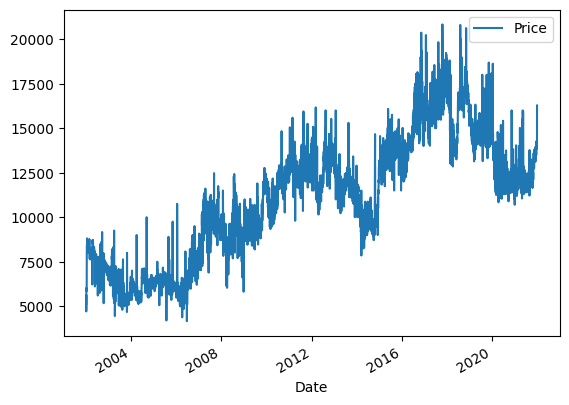

In [ ]:
df.set_index('Date')[['Price']].plot(subplots = True)

In [ ]:
df1= df['Price']

In [ ]:
import numpy as np
df1

0        5124.0
1        5628.3
2        4710.0
3        4940.0
4        6021.7
         ...   
6758    14037.8
6759    14050.3
6760    14033.8
6761    14025.2
6762    16275.0
Name: Price, Length: 6763, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
print(df1)

[[0.0576645 ]
 [0.08792171]
 [0.03282515]
 ...
 [0.5922386 ]
 [0.59172262]
 [0.72670711]]


In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.85)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(5748, 1015)

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 30
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(5717, 30)
(5717,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(984, 30)
(984,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for Stacked LSTM model
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
# Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(3,return_sequences=True,input_shape=(30,1)))
model.add(LSTM(8,return_sequences=True))
model.add(LSTM(8))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 30, 3)             60        
                                                                 
 lstm_7 (LSTM)               (None, 30, 8)             384       
                                                                 
 lstm_8 (LSTM)               (None, 8)                 544       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 997
Trainable params: 997
Non-trainable params: 0
_________________________________________________________________


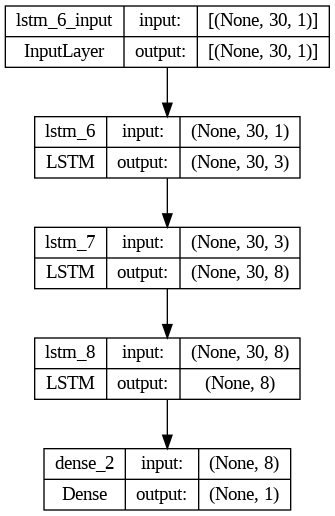

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=20,batch_size=32,verbose=1)

Epoch 1/20
179/179 [==============================] - 23s 54ms/step - loss: 0.0181 - val_loss: 0.0025
Epoch 2/20
179/179 [==============================] - 9s 51ms/step - loss: 0.0018 - val_loss: 0.0023
Epoch 3/20
179/179 [==============================] - 9s 50ms/step - loss: 0.0017 - val_loss: 0.0023
Epoch 4/20
179/179 [==============================] - 8s 46ms/step - loss: 0.0017 - val_loss: 0.0023
Epoch 5/20
179/179 [==============================] - 9s 53ms/step - loss: 0.0017 - val_loss: 0.0027
Epoch 6/20
179/179 [==============================] - 8s 43ms/step - loss: 0.0017 - val_loss: 0.0024
Epoch 7/20
179/179 [==============================] - 10s 54ms/step - loss: 0.0017 - val_loss: 0.0023
Epoch 8/20
179/179 [==============================] - 7s 42ms/step - loss: 0.0017 - val_loss: 0.0023
Epoch 9/20
179/179 [==============================] - 9s 53ms/step - loss: 0.0016 - val_loss: 0.0022
Epoch 10/20
179/179 [==============================] - 8s 44ms/step - loss: 0.0016 - val_

In [ ]:
pd.DataFrame(history.history)

,loss,val_loss
0,0.018124,0.002519
1,0.001819,0.002286
2,0.001747,0.002289
3,0.001744,0.002302
4,0.001695,0.002662
5,0.001668,0.002410
6,0.001678,0.002254
7,0.001662,0.002316
8,0.001593,0.002192
9,0.001562,0.002174


<Axes: >

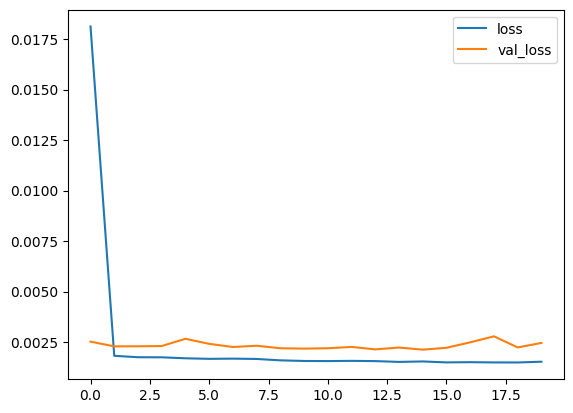

In [ ]:
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()

In [ ]:
import tensorflow as tf

In [ ]:
# prediction and check performance
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

31/31 [==============================] - 0s 11ms/step


In [ ]:
# reverseTransformation
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
# RMSE of train test
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

11628.209354232271

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

13539.732748005385

In [ ]:
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Define the actual and predicted values
y_true = y_train.tolist()
y_pred = train_predict.tolist()

# Calculate R-squared (r2score)
r2score = r2_score(y_true, y_pred)
print("R-squared (r2score):", r2score)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Absolute Percentage Error (MAPE)
# mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
# print("Mean Absolute Percentage Error (MAPE):", mape)

NameError: ignored

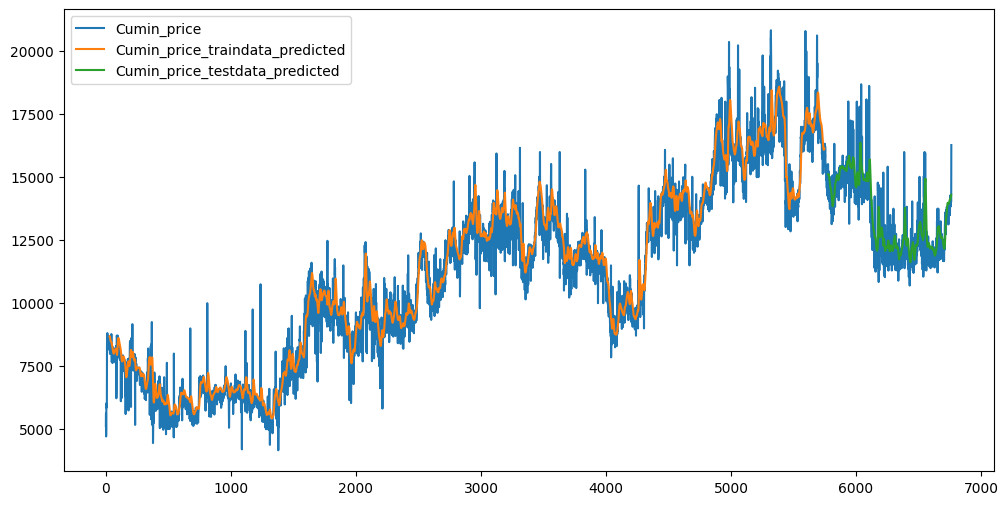

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=30
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(df1), label = 'Cumin_price')
plt.plot(trainPredictPlot, label = 'Cumin_price_traindata_predicted')
plt.plot(testPredictPlot, label = 'Cumin_price_testdata_predicted')
plt.legend()
plt.show()

In [ ]:
#printing the testing predicted data
test_predict

array([[15109.41  ],
       [15129.581 ],
       [15126.816 ],
       [15105.619 ],
       [15077.368 ],
       [15062.126 ],
       [15048.171 ],
       [15023.668 ],
       [14989.581 ],
       [14942.033 ],
       [14890.99  ],
       [14842.733 ],
       [14792.34  ],
       [14738.874 ],
       [14676.516 ],
       [14617.538 ],
       [14586.108 ],
       [14568.307 ],
       [14569.003 ],
       [14568.195 ],
       [14557.439 ],
       [14533.471 ],
       [14502.038 ],
       [14462.867 ],
       [14421.146 ],
       [14372.719 ],
       [14331.693 ],
       [14288.386 ],
       [14230.715 ],
       [14163.595 ],
       [14089.696 ],
       [14021.69  ],
       [13953.621 ],
       [13897.153 ],
       [13846.012 ],
       [13845.825 ],
       [13857.661 ],
       [13884.091 ],
       [13919.394 ],
       [13953.469 ],
       [14009.592 ],
       [14074.889 ],
       [14133.906 ],
       [14174.957 ],
       [14199.6   ],
       [14214.944 ],
       [14223.838 ],
       [14238

In [ ]:
len(test_data)

1015

In [ ]:
x_input=test_data[985:].reshape(1,-1)
x_input.shape

(1, 30)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.566439272578913,
 0.571155149966101,
 0.5707891594818535,
 0.5631333585326782,
 0.5692052006647828,
 0.5652753028421261,
 0.5377120194874934,
 0.5844448044350847,
 0.582314859813645,
 0.5860167635641474,
 0.5815348800931176,
 0.5884107013217657,
 0.559029465233904,
 0.5810968914808216,
 0.5859087663720743,
 0.5750850477887576,
 0.5744790635443479,
 0.5694691938009612,
 0.560001439962561,
 0.5903486509350757,
 0.5886206958619077,
 0.6068482219462294,
 0.5942785487577323,
 0.5912726269117005,
 0.5805269063004362,
 0.5924785955565156,
 0.5932285760570225,
 0.5922386017963533,
 0.5917226152120046,
 0.7267071056152541]

In [ ]:
# demonstrate prediction for next 30 days
from numpy import array

lstm_output=[]
n_steps=30
i=0
while(i<365):
    
    if(len(temp_input)>30):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lstm_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lstm_output.extend(yhat.tolist())
        i=i+1
print(lstm_output)   

[0.61390555]
31
1 day input [0.57115515 0.57078916 0.56313336 0.5692052  0.5652753  0.53771202
 0.5844448  0.58231486 0.58601676 0.58153488 0.5884107  0.55902947
 0.58109689 0.58590877 0.57508505 0.57447906 0.56946919 0.56000144
 0.59034865 0.5886207  0.60684822 0.59427855 0.59127263 0.58052691
 0.5924786  0.59322858 0.5922386  0.59172262 0.72670711 0.61390555]
1 day output [[0.6190457]]
2 day input [0.57078916 0.56313336 0.5692052  0.5652753  0.53771202 0.5844448
 0.58231486 0.58601676 0.58153488 0.5884107  0.55902947 0.58109689
 0.58590877 0.57508505 0.57447906 0.56946919 0.56000144 0.59034865
 0.5886207  0.60684822 0.59427855 0.59127263 0.58052691 0.5924786
 0.59322858 0.5922386  0.59172262 0.72670711 0.61390555 0.61904567]
2 day output [[0.6243515]]
3 day input [0.56313336 0.5692052  0.5652753  0.53771202 0.5844448  0.58231486
 0.58601676 0.58153488 0.5884107  0.55902947 0.58109689 0.58590877
 0.57508505 0.57447906 0.56946919 0.56000144 0.59034865 0.5886207
 0.60684822 0.59427855 0

In [ ]:
lstm_output1 = scaler.inverse_transform(lstm_output)

In [ ]:
lstm_output1

array([[14394.92517656],
       [14480.59616647],
       [14569.02891006],
       [14654.33232844],
       [14733.68307487],
       [14806.89140295],
       [14874.1450722 ],
       [14935.84642443],
       [14995.35923589],
       [15051.99902877],
       [15106.82182616],
       [15160.23195674],
       [15213.03013039],
       [15264.43848627],
       [15316.26408551],
       [15367.89497118],
       [15418.88807057],
       [15469.60300772],
       [15519.89076715],
       [15569.61624147],
       [15619.93082368],
       [15669.66523893],
       [15719.41356229],
       [15768.17739001],
       [15816.35210984],
       [15863.74300821],
       [15911.05542509],
       [15957.87013025],
       [16004.12950436],
       [16049.86335052],
       [16098.89838642],
       [16143.36460752],
       [16187.5506795 ],
       [16231.42679927],
       [16274.93932125],
       [16318.03360643],
       [16360.67289767],
       [16402.81547061],
       [16444.44244998],
       [16485.53893421],


In [ ]:
day_new1=np.arange(1,366)
day_pred1=np.arange(366,731)

In [ ]:
day_raw=np.arange(1,6763)
day_train=np.arange(31,5748)
day_test=np.arange(5749,6733)
day_pred=np.arange(6764,7129)

In [ ]:
import matplotlib.pyplot as plt

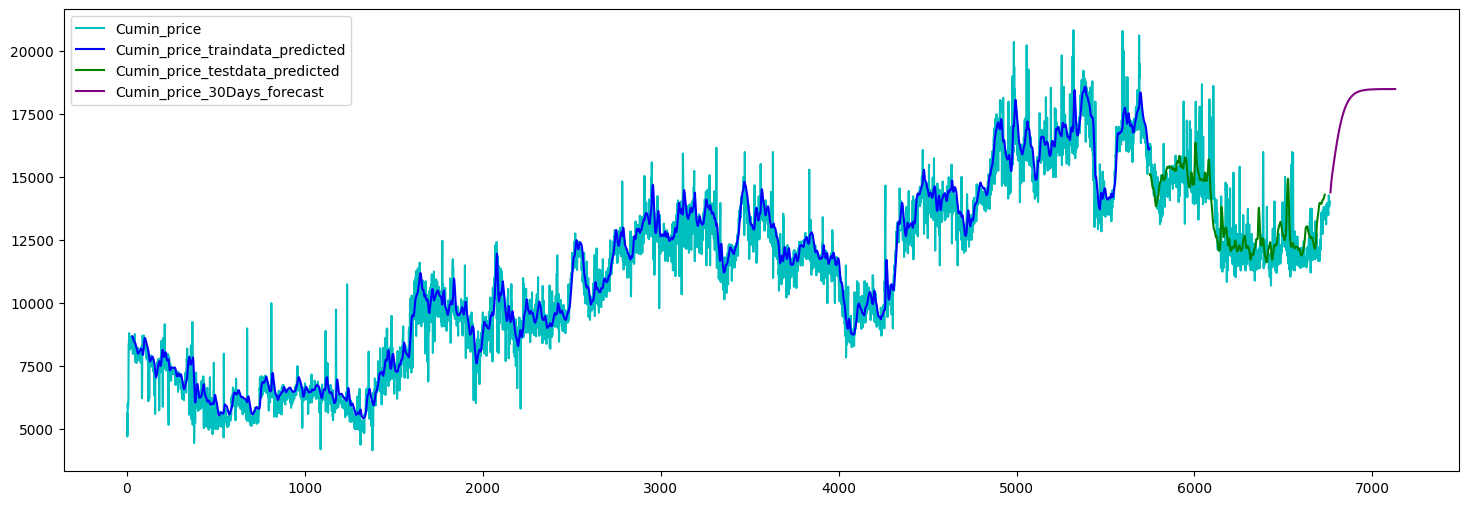

In [ ]:
plt.figure(figsize=(18, 6))
plt.plot(day_raw,scaler.inverse_transform(df1[:-1]), color = 'c', label = 'Cumin_price')
plt.plot(day_train,train_predict, color = 'blue', label = 'Cumin_price_traindata_predicted')
plt.plot(day_test,test_predict, color = 'green', label = 'Cumin_price_testdata_predicted')
plt.plot(day_pred,scaler.inverse_transform(lstm_output), color = 'purple', label = 'Cumin_price_365Days_forecast')
plt.legend()
plt.show()

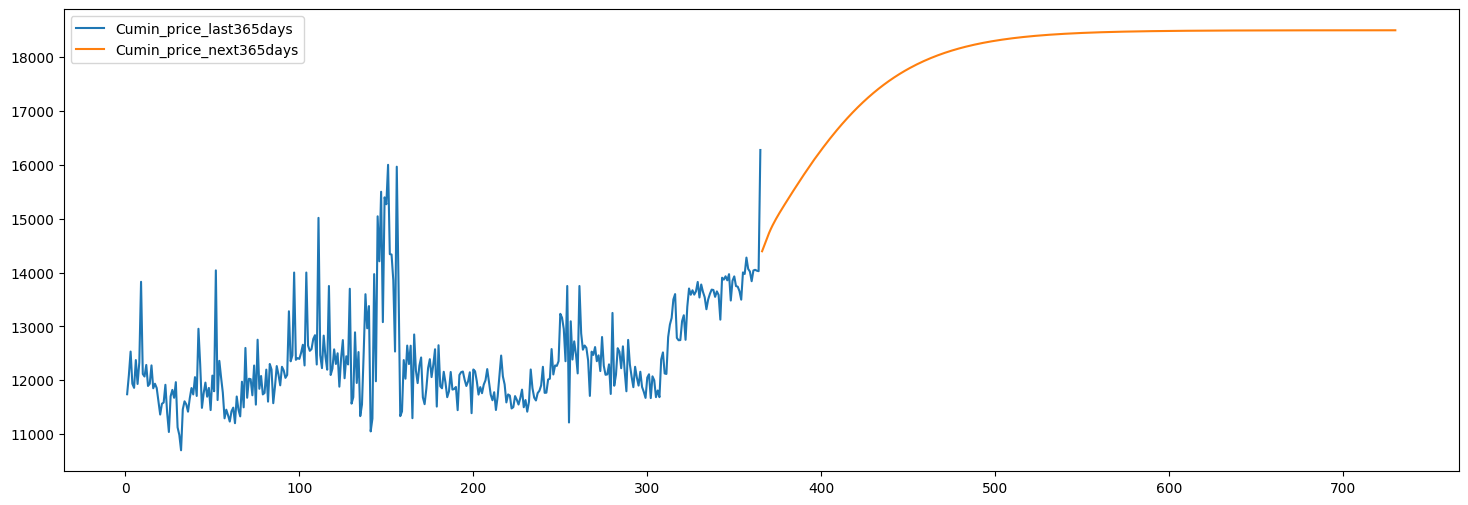

In [ ]:
#plotting the graph showing forecast
plt.figure(figsize=(18, 6))
plt.plot(day_new1,scaler.inverse_transform(df1[6398:]), label = 'Cumin_price_last365days')
plt.plot(day_pred1,lstm_output1, label = 'Cumin_price_next365days')
plt.legend()
plt.show()